# Construction of Bell and GHZ states

Just to begin we import Python's libraries necessary for building quantum circuits.

In [1]:
#import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

## Bell States

In order to construct the Bell states we will create a quantum circuit made up of two qubits. 

In [2]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(q)

Firstly we will get the Bell state:
\begin{equation}
|\phi_{+}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuit.cx(q[0], q[1])

#We would like to measure the output of the quantum circuit.
def meass(q, m):
    # Create a Classical Register with m bits.
    c = ClassicalRegister(m, 'c')
    # Create a Quantum Circuit for the measures
    meas = QuantumCircuit(q, c)
    meas.barrier(q)
    # map the quantum measurement to the classical bits
    meas.measure(q,c)
    return meas

meas = meass(q, 2)
# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit+meas

#drawing the circuit
qc.draw()

In [4]:
#We now import Aer in order to run the quantum circuit of a statevector simulator backend
from qiskit import BasicAer

def outputstate(circuit):
    backend = BasicAer.get_backend('statevector_simulator')
    # Create a Quantum Program for execution 
    job = execute(circuit, backend)
    result = job.result()
    outputstate = result.get_statevector(circuit, decimals=3)
    return outputstate

output1 = outputstate(circuit)
print(output1)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


C:\Users\javig\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\visualization\state_visualization.py:770: MatplotlibDeprecationWarning: 
The mod function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.linalg.norm instead.
  for n in normals])


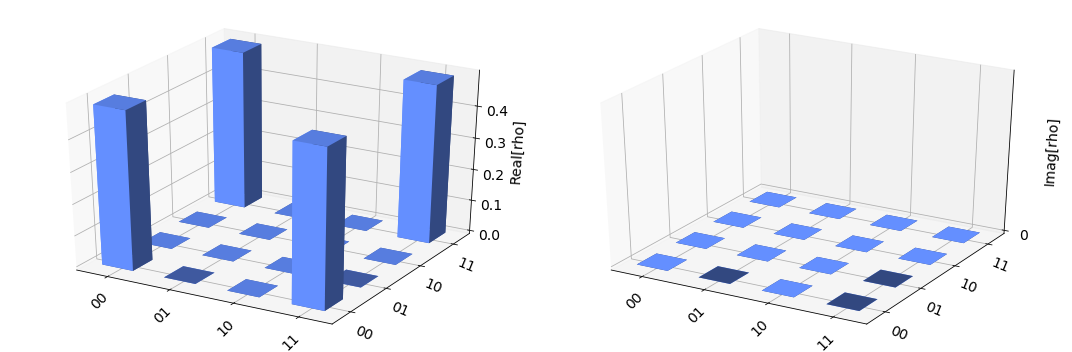

In [5]:
#Lets visualize the density matrix.
from qiskit.tools.visualization import plot_state_city
plot_state_city(output1, alpha = 1)

In [6]:
help(plot_state_city)

Help on function plot_state_city in module qiskit.visualization.state_visualization:

plot_state_city(rho, title='', figsize=None, color=None, alpha=1)
    Plot the cityscape of quantum state.
    
    Plot two 3d bar graphs (two dimensional) of the real and imaginary
    part of the density matrix rho.
    
    Args:
        rho (ndarray): Numpy array for state vector or density matrix.
        title (str): a string that represents the plot title
        figsize (tuple): Figure size in inches.
        color (list): A list of len=2 giving colors for real and
        imaginary components of matrix elements.
        alpha (float): Transparency value for bars
    Returns:
         matplotlib.Figure: The matplotlib.Figure of the visualization
    
    Raises:
        ImportError: Requires matplotlib.
        ValueError: When 'color' is not a list of len=2.



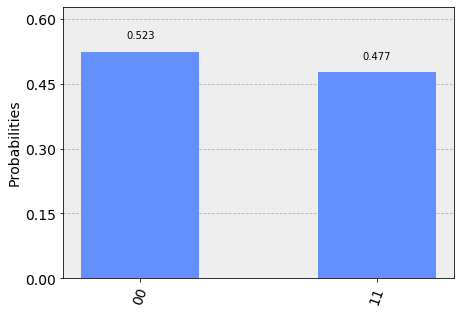

In [7]:
def simulator(qc, shots = 1024):
    #We are now going to simulate the circuit many times.
    # Use Aer's qasm_simulator
    backend_sim = BasicAer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = execute(qc, backend_sim, shots = shots)

    # Grab the results from the job.
    result_sim = job_sim.result()

    #Give the output counts
    counts = result_sim.get_counts(qc)
    return counts

counts = simulator(qc)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

After this we will get the Bell state:
\begin{equation}
|\phi_{-}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A $NOT$ gate $H$ on qubit 0 changing it state from $|0\rangle$ to $|1\rangle$.
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.

In [8]:
#Proceeding as it was done before.
circuit = QuantumCircuit(q)

#Add a X gate on qubit 0.
circuit.x(q[0])
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuit.cx(q[0], q[1])

#Lets now generate the circuit and represented.
qc = circuit+meas

#drawing the circuit
qc.draw()

#Getting the outputstate.
output2 = outputstate(circuit)
print(output2)

[ 0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j]


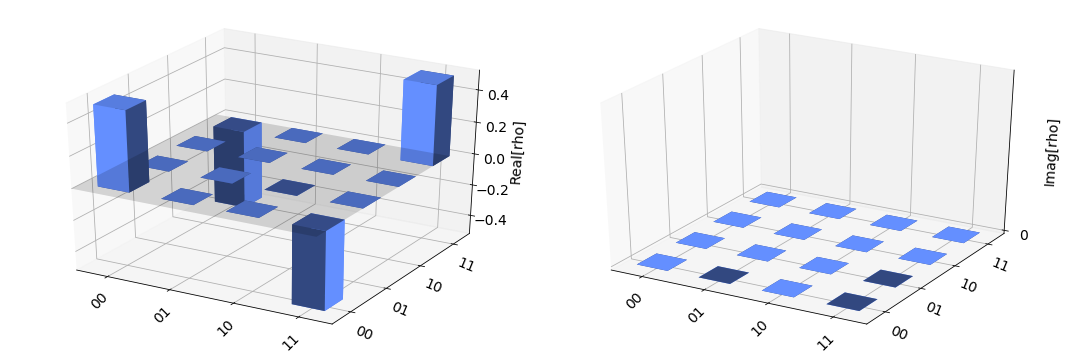

In [9]:
#Lets visualize the density matrix.
plot_state_city(output2)

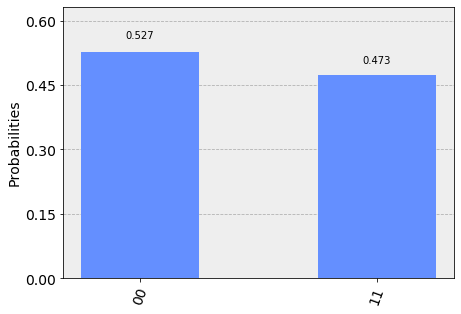

In [10]:
#We are now going to simulate the circuit many times.
counts = simulator(qc)
plot_histogram(counts)

Finally we will get the Bell states:
\begin{equation}
|\psi_{+}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\\
|\psi_{-}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\\
\end{equation}

In the first state the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.
* A $NOT$ gate $H$ on qubit 1.

While in the second one the gates will be the following:
* A $NOT$ gate on qubit 0 changing it state from $|0\rangle$ to $|1\rangle$.
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.
* A $NOT$ gate $H$ on qubit 1.

In [11]:
#Proceeding as it was done before.
circ1 = QuantumCircuit(q)
circ2 = QuantumCircuit(q)

#Psi+:
circ1.h(q[0])
circ1.cx(q[0], q[1])
circ1.x(q[1])

#Psi_:
circ2.x(q[0])
circ2.h(q[0])
circ2.cx(q[0], q[1])
circ2.x(q[1])

# Generating the quantum circuits.
qc1 = circ1+meas
qc2 = circ2+meas

#drawing the circuits
qc1.draw()

In [12]:
qc2.draw()

In [13]:
#Getting the outputstates.
output3 = outputstate(circ1)
print(output3)

output4 = outputstate(circ2)
print(output4)

[0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]
[ 0.   +0.j -0.707+0.j  0.707+0.j  0.   +0.j]


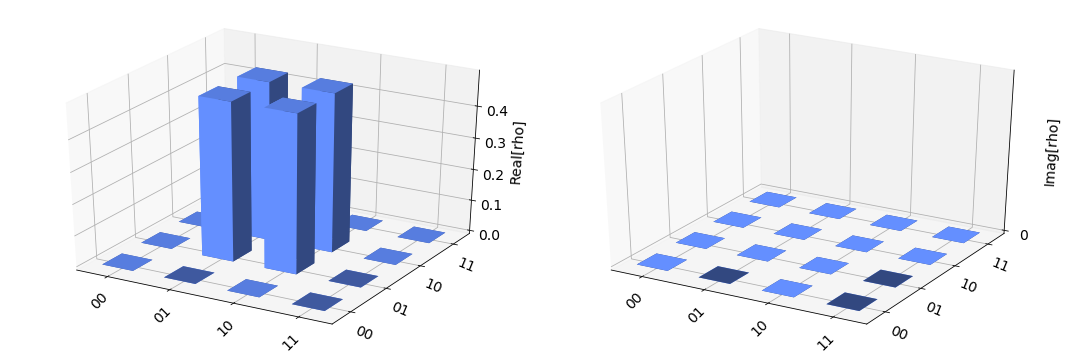

In [14]:
#Lets visualize the density matrices.
plot_state_city(output3)

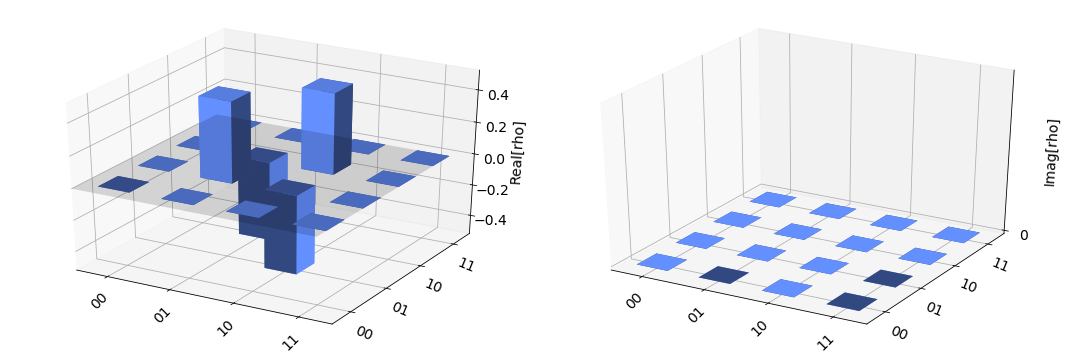

In [15]:
plot_state_city(output4)

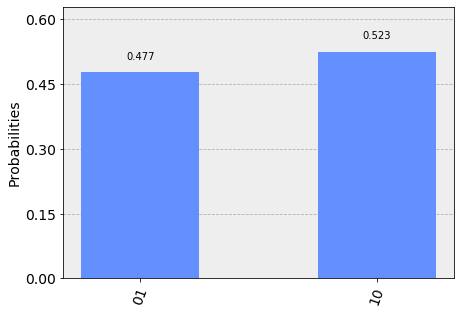

In [16]:
#We are now going to simulate the circuit many times.
counts1 = simulator(qc1)
plot_histogram(counts1)

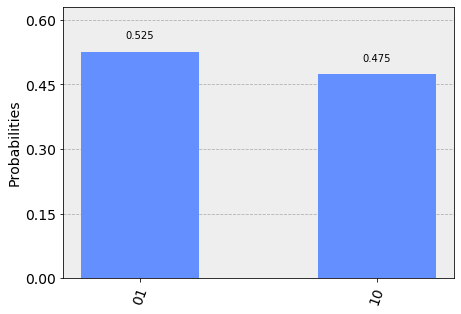

In [17]:
#We are now going to simulate the circuit many times.
counts2 = simulator(qc2)
plot_histogram(counts2)

## GHZ State

We are now going to create the GHZ state for n qubits:

\begin{equation}
|\phi\rangle = \frac{1}{\sqrt{2}}\left(|0...0\rangle+|1...1\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 0 and the rest.

In [18]:
#Firstly we set the number of qubits, n:
n = 4

# Create a Quantum Register with n qubits.
q = QuantumRegister(n, 'q')

# Create a Quantum Circuit acting on the q register
circuito = QuantumCircuit(q)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuito.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit j, where j represent all the other qubits.
for j in range(1, n):
    circuito.cx(q[0], q[j])

meas = meass(q, n)
# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuito+meas

#drawing the circuit
qc.draw()

In [19]:
#Getting the outputstate.
output5 = outputstate(circuito)
print(output5)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.707+0.j]


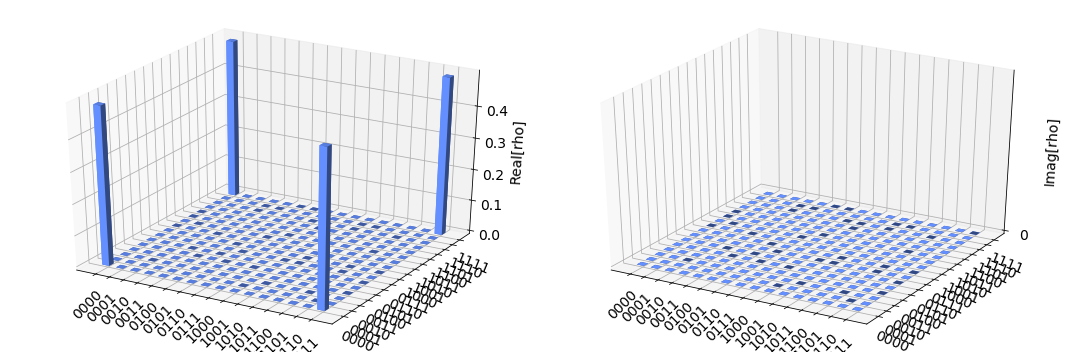

In [20]:
#Lets visualize the density matrix.
plot_state_city(output5)

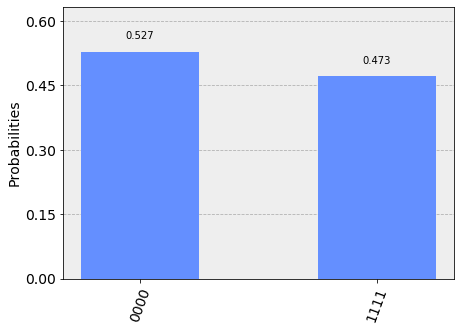

In [21]:
#We are now going to simulate the circuit many times.
counts = simulator(qc)
plot_histogram(counts)

## Bibliography

**[1]** Sipser, M. (1992, July). The history and status of the P versus NP question. In Proceedings of the twenty-fourth annual ACM symposium on Theory of computing (pp. 603-618). ACM.

**[2]** NP-Completeness | Set 1 (Introduction). (2018, September 07). Retrieved from https://www.geeksforgeeks.org/np-completeness-set-1/

**[3]** P versus NP problem. (2019, January 13). Retrieved from https://en.wikipedia.org/wiki/P_versus_NP_problem

**[4]** UNIVERSITY OF PENNSYLVANIA, S. (2017). Chapter 10. Some NP-Complete Problems.

**[5]** Exact Cover Problem and Algorithm X | Set 1. (2018, February 15). Retrieved from https://www.geeksforgeeks.org/exact-cover-problem-algorithm-x-set-1/

**[6]** Variational-Quantum-Eigensolver (VQE)¶. (n.d.). Retrieved from https://grove-docs.readthedocs.io/en/latest/vqe.html

**[7]** Qiskit. (2019, February 11). Qiskit/qiskit-tutorials. Retrieved from https://github.com/Qiskit/qiskit-tutorials